# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Support Vector Machines</center>
### <center> Práctica SVM </center>


## Repaso teórico

Las máquinas de soporte vectorial (SVM, del inglés support vector machines) son una técnica de aprendizaje automático supervisado. Si bien originalmente fueron diseñadas para resolver problemas de clasificación binaria, en la actualidad se aplican para resolver problemas más complejos como los de regresión, agrupamiento y multiclasificación.

Entre los campos de aplicación más difundidos podemos mencionar los siguientes:

* visión artificial
* reconocimiento de caracteres
* procesamiento de lenguaje natural
* análisis de series temporales



Las SVM se pueden incluir en la categoría de clasificadores lineales, puesto que
una SVM construye un hiperplano o conjunto de hiperplanos en el espacio original cuando los conjuntos son linealmente separables o bien en el espacio transformado, denominado espacio de características aumentado, cuando los conjuntos no son linealmente separables.


**Kernels**

* Las SVM pueden definir un límite de decisión lineal o no lineal mediante el uso de funciones kernel. El uso de kernels abren la posibilidad de abordar problemas más complejos.

* Los datos son mapeados por medio de la transformación kernel o núcleo, a un  espacio de dimensión mayor que el original en el cual se logra una mejor separación entre las clases. 

* Las SVM en realidad no calculan la transformación de cada observación en el espacio aumentado, en su lugar calculan el producto interno de las observaciones en el espacio aumentado que, computacionalmente, es mucho más barato.



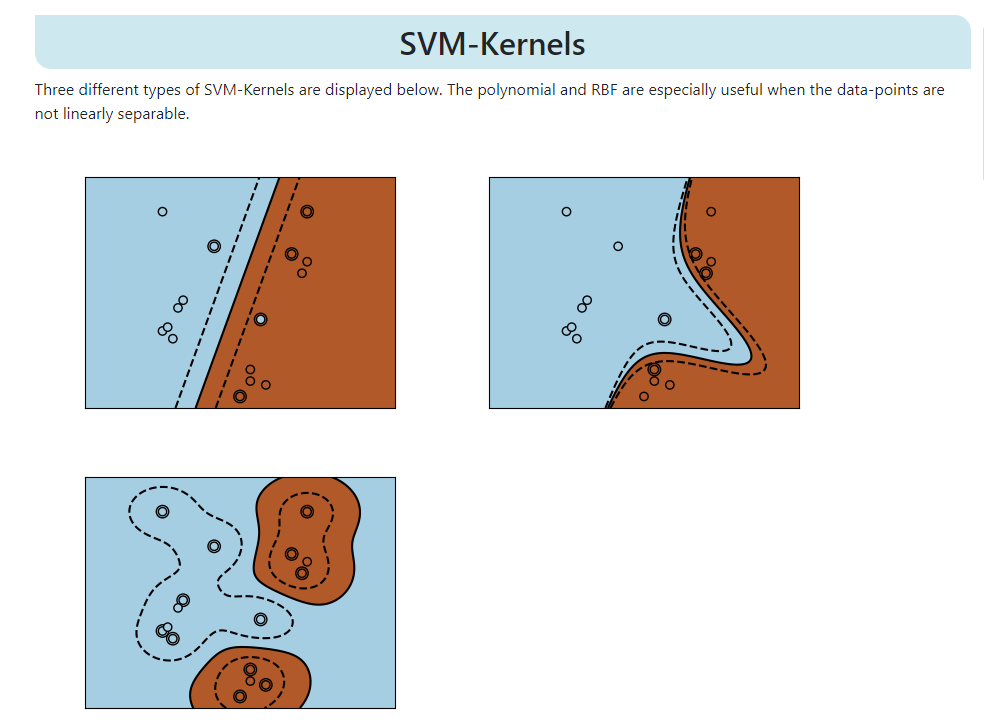

**Vectores de Soporte**

* Las máquinas de vectores de soporte también dibujan un margen alrededor del límite de decisión(un margen nos da más "confianza" en nuestras predicciones).
La posición del margen se define utilizando los vectores que están más cerca del límite de decisión: los vectores que se encuentran en la parte superior del margen son los vectores de soporte.

* Las máquinas de vectores de soporte permiten cierta clasificación errónea durante el proceso de aprendizaje. Para que puedan hacer un mejor trabajo al clasificar la mayoría de los vectores en el conjunto de prueba.

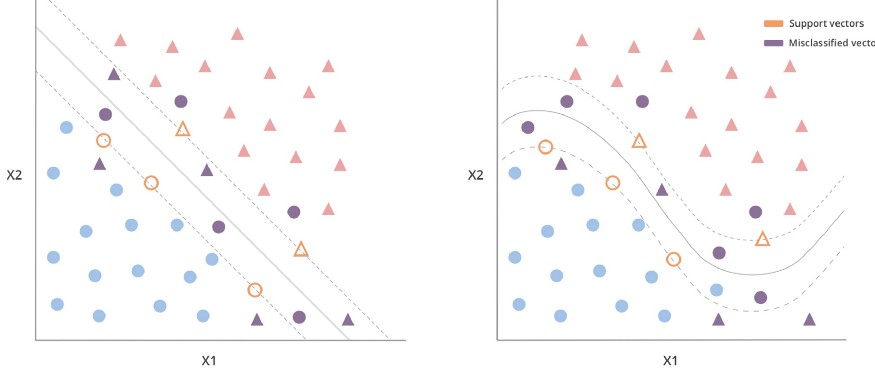

**Sintetizamos los pasos del procedimiento de las SVM de la siguiente manera:**

* Se mapean los puntos de entrada a un espacio de características de una dimensión mayor; por ejemplo, si los puntos de entrada están en R2 pueden ser mapeados a R3.

* Se busca en la imagen de este mapeo un hiperplano que los separe y que maximice el margen entre las clases.

* La solución del hiperplano óptimo puede ser escrita como la combinación de unos pocos puntos de entrada que son llamados vectores soporte.

Links de Interes:

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels

https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise

## Librerias y Funciones

In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

## Carga de Datos

In [ ]:
dataset=pd.read_csv('./datasets/wine.csv')
dataset['quality'] = dataset['quality'].map({'bad':1,'good':0},na_action=None)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']
          
target='quality'

## SVM + Normalización de Datos

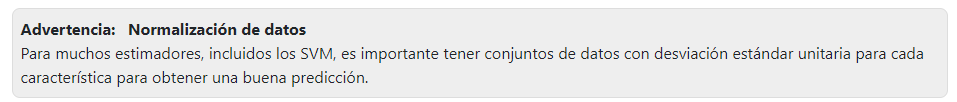

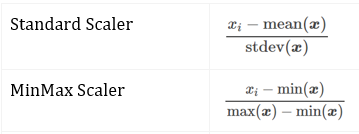

In [ ]:
#Creo conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, dataset[target].values, test_size=0.2, random_state=0)

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.fit_transform(x_test) 

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.fit_transform(x_test)

              precision    recall  f1-score   support

           0       0.60      0.85      0.71       172
           1       0.67      0.34      0.46       148

    accuracy                           0.62       320
   macro avg       0.64      0.60      0.58       320
weighted avg       0.63      0.62      0.59       320



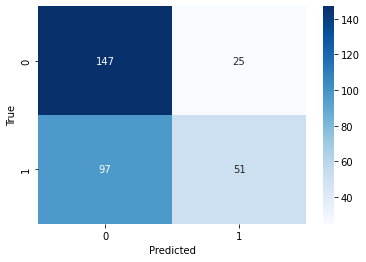

In [ ]:
#Construyo un modelo SVM  
svm = SVC()

#Lo entreno con los datos sin escalar
svm.fit(x_train, y_train)

#Hago la prediccion y calculo las métricas
y_pred=svm.predict(x_test)
metricas(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       172
           1       0.73      0.74      0.74       148

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



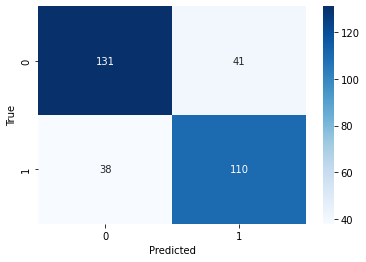

In [ ]:
#Construyo un modelo SVM  
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       172
           1       0.72      0.80      0.76       148

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



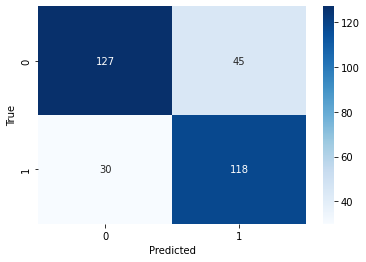

In [ ]:
#Construyo un modelo SVM  
svm_minmax= SVC()

#Lo entreno con los datos escalados con min max
svm_minmax.fit(x_train_minmax, y_train)

#Hago la prediccion y calculo las métricas
y_pred_minmax=svm_minmax.predict(x_test_minmax)
metricas(y_pred_minmax,y_test)

## SVM + PCA

Veamos un ejemplo donde podamos aplicar PCA y SVM.

Recordemos que necesitamos escalar los datos para poder aplicar PCA.

Text(0, 0.5, 'Varianza Explicada (%)')

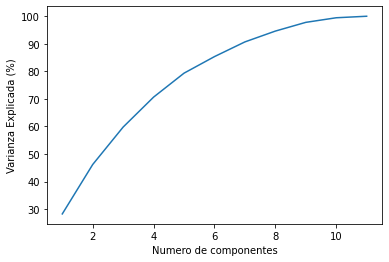

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalo los datos de entrenamiento
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

# PCA sobre los datos escalados
pca = PCA(n_components = None)
pca.fit(x_train_scaled)

#Cantidad de Componentes
componentes = len(pca.explained_variance_ratio_) 

#Grafico la Varianza Explicada 
plt.plot(range(1,componentes+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada (%)")

En el gráfico vemos que con las primeras 6 componentes principales se explica casi el 90% de la variabilidad de los datos. 

Probemos entrenar una SVM tomando sólo esas primeras 6 componentes

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       172
           1       0.75      0.72      0.74       148

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



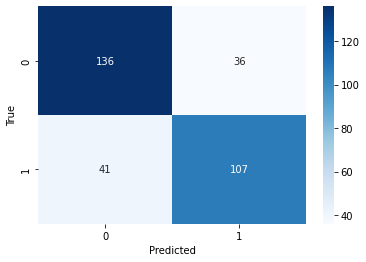

In [ ]:
from sklearn.pipeline import Pipeline

#Defino el tipo de escalado, la transformacion PCA y el modelo
_sc = StandardScaler()
_pca = PCA(n_components = 6)
_model = SVC()

#Creo un pipeline
svm_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('svm', _model)
])

#Entreno sobre los datos que serán previamente escalados y transformados
svm_model.fit(x_train,y_train)

#Hago la predicción y calculo las métricas
y_pred_pca=svm_model.predict(x_test)
metricas(y_pred_pca,y_test)

In [ ]:
import plotly.express as px

pca = PCA()
componentes = pca.fit_transform(x_train_scaled)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    componentes,
    labels=labels,
    dimensions=range(3),
    color=y_train
)

fig.update_traces(diagonal_visible=False)
fig.show()

## SVM - Kernels

Vamos a probar distintos kernels

Lista: https://scikit-learn.org/dev/modules/svm.html#svm-kernels

ToDo: optimizar los hiperparámetros.

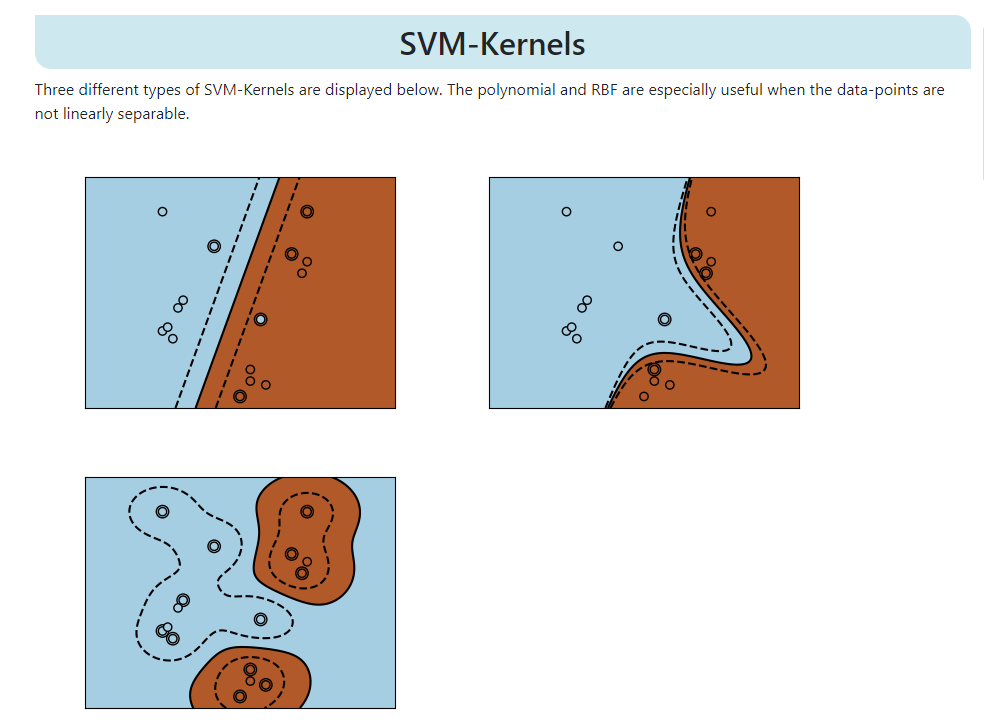

**SVM con kernel LINEAL**

Hiperparametros:

* C : Parámetro de regularización, debe ser estrictamente positiva.

La fuerza de la regularización es inversamente proporcional a C
- un valor pequeño significa que el margen se calcula utilizando muchas o todas las observaciones alrededor de la línea de separación (más regularización).
- un valor grande significa que el margen se calcula sobre observaciones cercanas a la línea de separación (menos regularización).

Nota: tambien esta https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html 

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       172
           1       0.70      0.80      0.75       148

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



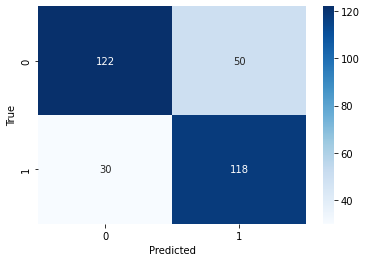

In [ ]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin=clf.predict(x_test_minmax)
metricas(y_pred_lin,y_test)

**SVM con kernel POLINOMICO**

Hiperparametros:

* C : Parámetro de regularización.

* degree: Grado de la función kernel polinomial ('poly'). Ignorado por todos los demás núcleos

* gamma: define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto más grande es, más cerca deben estar otros ejemplos para verse afectados.

* coef0 : se corresponde con el parámetro r de la ecucacion del kernel
K(a, b) =  (a . b + r) ^ d (d es el grado del polinomio).

La elección adecuada de C y gamma es fundamental para el rendimiento de la SVM. Se recomienda usar GridSearchCV con C y gamma espaciado exponencialmente para elegir buenos valores.

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       172
           1       0.53      0.55      0.54       148

    accuracy                           0.57       320
   macro avg       0.57      0.57      0.57       320
weighted avg       0.57      0.57      0.57       320



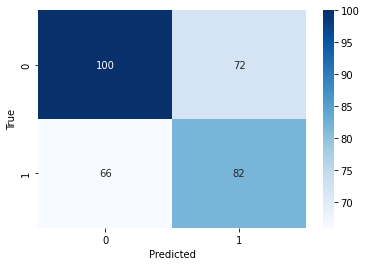

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='poly', C=5, degree=10, gamma=10, coef0=10)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_pol=clf.predict(x_test_minmax)
metricas(y_pred_pol,y_test)

**SVM con kernel RADIAL**

Hiperparametros:

* C : Parámetro de regularización.

* gamma:define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto más grande es, más cerca deben estar otros ejemplos para verse afectados

La elección adecuada de C y gamma es fundamental para el rendimiento de la SVM. Se recomienda usar GridSearchCV con C y gamma espaciado exponencialmente para elegir buenos valores.

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       172
           1       0.64      0.73      0.68       148

    accuracy                           0.69       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.69      0.69      0.69       320



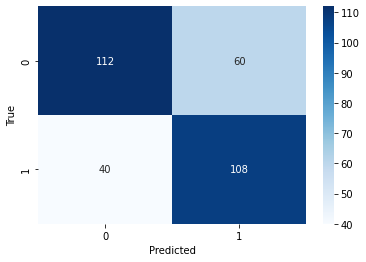

In [ ]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad=clf.predict(x_test_minmax)
metricas(y_pred_rad,y_test)